In [1]:
from sympy import *

In [ ]:
#ex aula 15: período natural de heave de navio caixa
rho, Nabla, a_33, A_w, g, L, B, T = symbols('rho, Nabla, a_33, A_w, g, L, B, T')

T_n3 = 2*pi*sqrt((rho*Nabla + a_33)/(rho*g*A_w))

T_n3.subs({Nabla : L*B*T, a_33 : rho*L*B*T,  A_w : L*B})

2*sqrt(2)*pi*sqrt(T/g)

In [ ]:
# outro ex aula 15: período nartural de heave e roll
#a) heave
rho, Nabla, a_33, A_w, g, m, GM_T = symbols('rho, Nabla, a_33, A_w, g, m, GM_T')
 
T_n3 = 2*pi*sqrt((rho*Nabla + a_33)/(rho*g*A_w))
 
var_dictionary = {Nabla : 214160,
                  a_33 : m,
                  A_w : 15300,
                  g : 9.81,
                  rho : 1025,
                  m : rho * Nabla}
 
T_n3 = T_n3.subs(var_dictionary)
T_n3 = T_n3.subs(var_dictionary)
 
T_n3.evalf()

10.6141159150850

In [ ]:
# outro ex aula 15: período nartural de heave e roll
#b) roll
rho, Nabla, a_44, A_w, g, I_xx, GM_T, omega_n4 = symbols('rho, Nabla, a_44, A_w, g, I_xx, GM_T, omega_n4')

omega_n4 = sqrt((rho * Nabla * g * GM_T)/(I_xx + a_44))


var_dictionary = {Nabla : 214160,
                  a_44 : 0.5*I_xx,
                  GM_T : 8.34,
                  g : 9.81,
                  rho : 1025,
                  I_xx : rho * Nabla * 17.82**2}

omega_n4 = omega_n4.subs(var_dictionary)
omega_n4 = omega_n4.subs(var_dictionary)

T_n4 = (2*pi)/omega_n4

T_n4.evalf()

15.1605748374375

In [ ]:
# ex aula 16: amplitude de movimento horizontal e fase de movimento do ponto
 
xi_P, xi_1, xi_5, r, omega, T, H, A, RAO_1, RAO_5 = symbols('xi_P, xi_1, xi_5, r, omega, T, H, A, RAO_1, RAO_5')
 
xi_1 = A * RAO_1
xi_5 = A * RAO_5
 
var_dictionary = {A : H/2,
                  H : 5.6,
                  T : 12,
                  RAO_1 : 0.03618 + 0.60892*I,
                  RAO_5 : (-0.09598 - 0.18838*I)*(pi/180)} #transformar para radiano
 
xi_1 = xi_1.subs(var_dictionary)
xi_5 = xi_5.subs(var_dictionary)
 
xi_P =  Matrix([xi_1, 0, 0]) + Matrix([0,xi_5, 0]).cross(Matrix([-10, 0, 90])) 
 
print('Amplitude horizontal: %f m' %(Abs(xi_P[0]).evalf()))
phase = arg(xi_P[0]).evalf()*(180/pi)
print('Fase: %f deg' %(phase.evalf()))

Amplitude horizontal: 0.933317 m
Fase: 110.106198 deg


In [ ]:
#ex aula 19
 
rho, A_s, C_M, u_0, w_0, w_0_dot, u_0_dot, D, C_D, x, y, z, t, A, k, h, g, T, lambda_, nu, mu, omega = symbols('rho, A_s, C_M, u_0, w_0, w_0_dot, u_0_dot, D, C_D, x, y, z, t, A, k, h, g, T, lambda, nu, mu, omega')
 
f_x = rho*A_s*C_M*u_0_dot + 0.5*(rho*D*C_D*u_0*abs(u_0))
 
 
#descomentar isso se for cilindro deitado
#f_x = rho*A_s*C_M*u_0_dot + 0.5*(rho*D*C_D*u_0*sqrt(u_0**2 + w_0**2))
#f_z = rho*A_s*C_M*u_0_dot + 0.5*(rho*D*C_D*w_0*sqrt(u_0**2 + w_0**2))
 
 
 
KC = ((A*T)/D) * sqrt(g/h) ## vale para aguas rasas cilindro vertical
 
var_dictionary = {
    omega : 2*pi/T,
    T : 15,
    h : 5,
    D : 0.3,
    g : 9.8,
    A : 0.25,
    u_0 : omega*A*(((cosh(k*(z+h))))/sinh(k*h))*cos(omega*t), # válido para kA << 1
    u_0_dot : diff(u_0, t),
    w_0 : omega*A*(((sinh(k*(z+h))))/sinh(k*h))*sin(omega*t), 
    w_0_dot : diff(w_0, t),
    nu : 1.2*10**(-6), #viscosidade cinemática
    rho : 1025
}
 
# valor k
eq = (omega**2)/(g*k*h) - k
eq = eq.subs(var_dictionary)
eq = eq.subs(var_dictionary)
var_dictionary[k] = abs(solve(eq,k)[0])
 
lambda_ = 2*pi/var_dictionary[k]
ka = pi*D/lambda_
 
ka = ka.subs(var_dictionary)
 
print('ka = %f' %(ka.evalf()))
 
KC = KC.subs(var_dictionary) 
KC = KC.subs(var_dictionary)
 
beta = (1/nu)*((D**2)/T)
 
beta = beta.subs(var_dictionary)
beta = beta.subs(var_dictionary)
 
 
var_dictionary[C_M] = 1.7 #pegar do graf
var_dictionary[C_D] = 0.8
 
print('KC = %f' %(KC.evalf()))
print('beta = %f' %(beta.evalf()))
 
 
f_x = f_x.subs(var_dictionary)
f_x = f_x.subs(var_dictionary)
f_x = f_x.subs(var_dictionary)
 
F_x = integrate(f_x,(z,0,-5)) #se for deitado, integrar em y
 
print('F_x = %s' %(F_x.evalf()))
 
 
#f_z = f_z.subs(var_dictionary)
#f_z = f_z.subs(var_dictionary)
#f_z = f_z.subs(var_dictionary)
#
#F_z = integrate(f_z,(y,0,-5))
#
#print('F_z = %s' %(F_z.evalf()))

ka = 0.008976
KC = 17.500000
beta = 5000.000000
F_x = -75.3506908174252*cos(2*pi*t/15)*Abs(cos(2*pi*t/15))


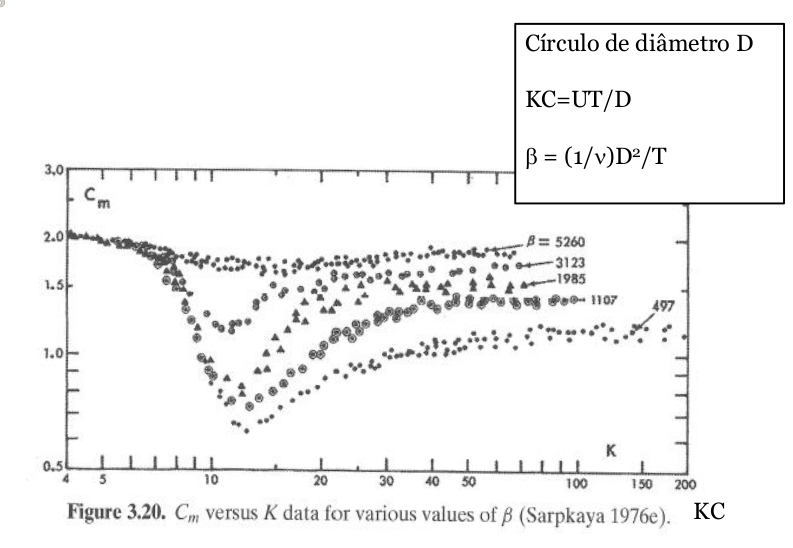



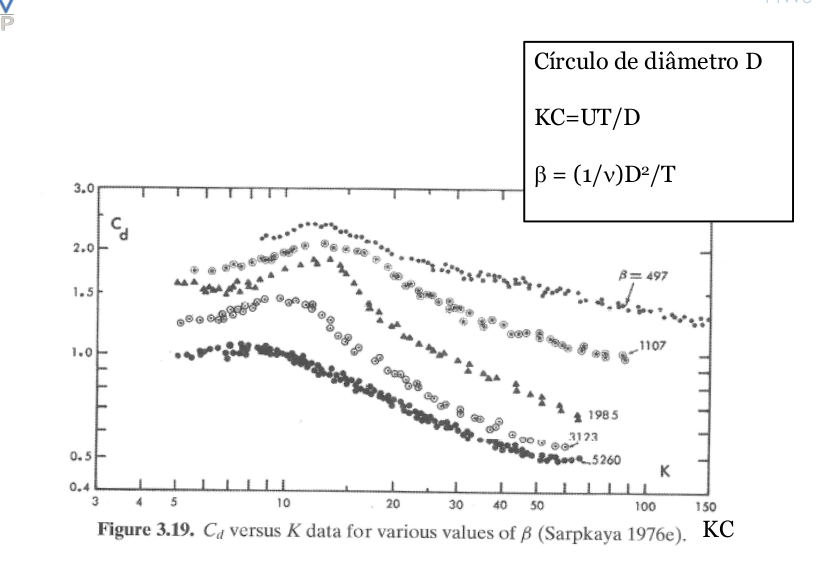

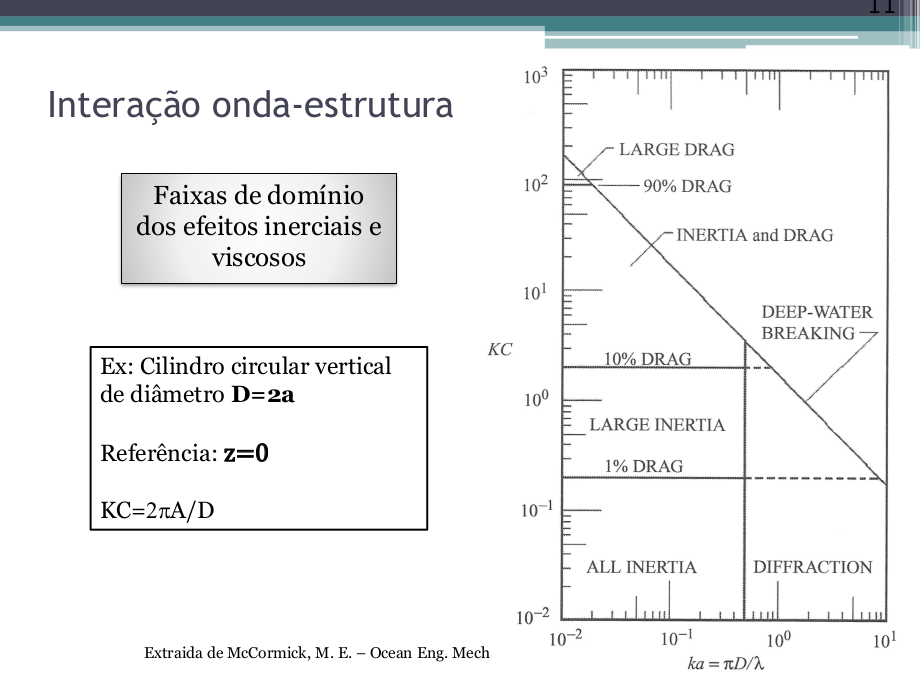

In [ ]:
## Fórmula RAO

Chi_3, Chi_4, a_44, b_44, c_44, I_xx, omega, a_33, b_33, c_33, m = symbols('Chi_3, Chi_4, a_44, b_44, c_44, I_xx, omega, a_33, b_33, c_33, m')

RAO_3 = Chi_3/(-omega**2 * (m + a_33) + I * b_33 + c_33)

RAO_4 = Chi_4/(-omega**2 * (I_xx + a_44) + I * b_44 + c_44)

#var_dictionary = {Chi_3 : ,
#                  omega : ,
#                  a_33 : ,
#                  b_33 : ,
#                  c_33 : ,
#                  m : 
#                  }